In [111]:
# loading the libraries
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
333,15587177,Male,40,65000,0
58,15642885,Male,22,18000,0
110,15665416,Female,39,71000,0
231,15694453,Male,39,42000,0
148,15779862,Male,29,61000,0
82,15709476,Male,20,49000,0
200,15628523,Male,35,39000,0
29,15669656,Male,31,18000,0
195,15667742,Male,34,43000,0
136,15668504,Female,20,82000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.duplicated().sum()

0

In [11]:
df.describe()[['Age','EstimatedSalary']]

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


# EDA

Female    204
Male      196
Name: Gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

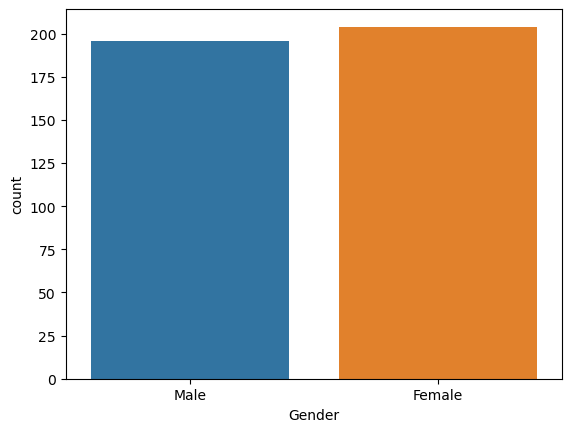

In [19]:
print(df['Gender'].value_counts())
sns.countplot(df,x='Gender')


0    257
1    143
Name: Purchased, dtype: int64


<AxesSubplot: xlabel='Purchased', ylabel='count'>

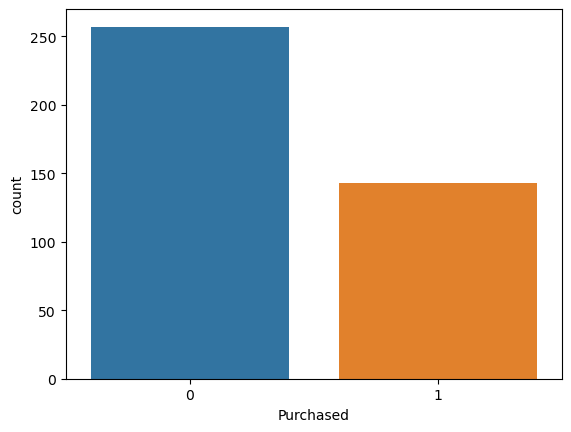

In [21]:
print(df['Purchased'].value_counts())
sns.countplot(df,x='Purchased')

C:\Users\hp\AppData\Local\Temp\ipykernel_19416\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

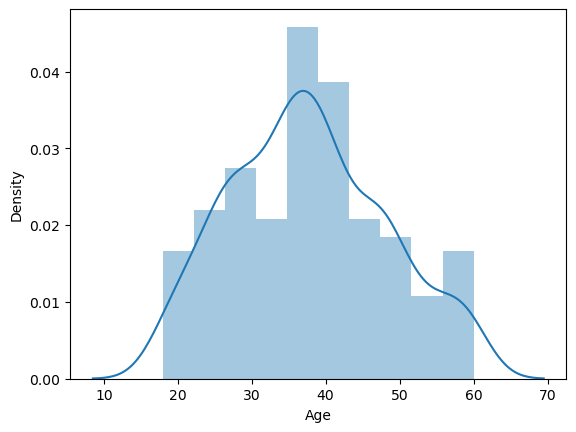

In [20]:
sns.distplot(df['Age'])

<AxesSubplot: >

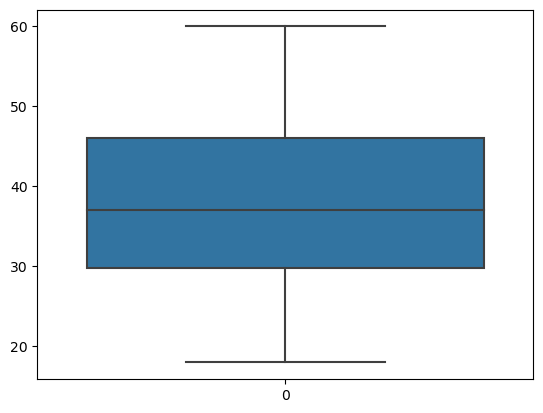

In [25]:
sns.boxplot(df['Age'])


<AxesSubplot: >

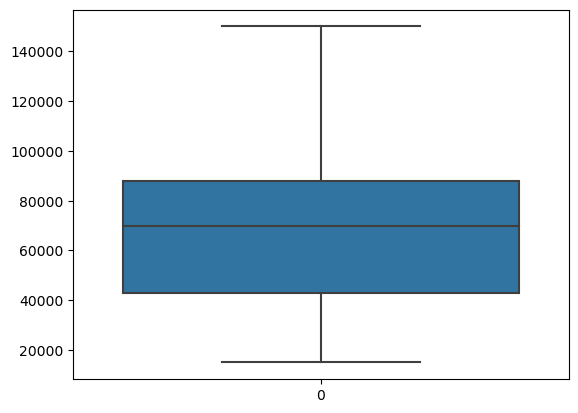

In [27]:
sns.boxplot(df['EstimatedSalary'])

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

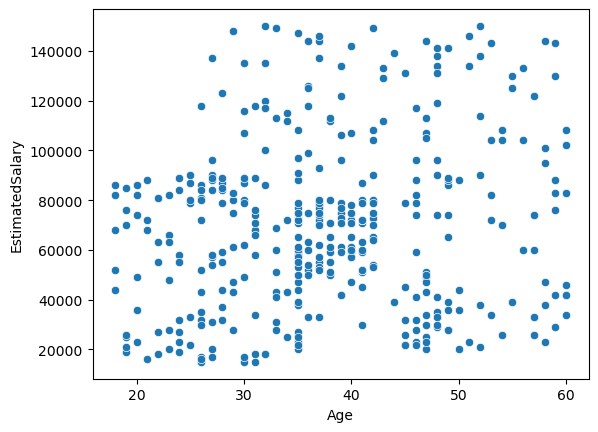

In [33]:
sns.scatterplot(df,x='Age',y='EstimatedSalary')

<AxesSubplot: xlabel='Gender', ylabel='count'>

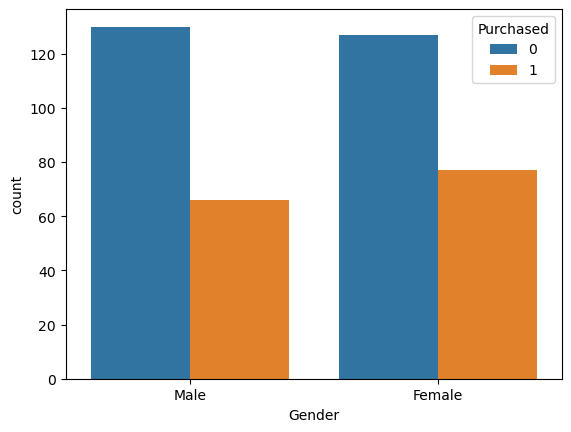

In [31]:
sns.countplot(df,x="Gender",hue='Purchased')

In [38]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [40]:
# Let's Do now train test split
# always do before train test slpit before scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [41]:
Scaler=StandardScaler()

In [42]:
Scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_scal=Scaler.transform(X_train)
X_test_scal=Scaler.transform(X_test)

In [45]:
X_train,X_test

(     Age  EstimatedSalary
 3     27            57000
 18    46            28000
 202   39           134000
 250   44            39000
 274   57            26000
 ..   ...              ...
 71    24            27000
 106   26            35000
 270   43           133000
 348   39            77000
 102   32            86000
 
 [320 rows x 2 columns],
      Age  EstimatedSalary
 209   46            22000
 280   59            88000
 33    28            44000
 210   48            96000
 93    29            28000
 ..   ...              ...
 246   35            50000
 227   56           133000
 369   54            26000
 176   35            47000
 289   37            78000
 
 [80 rows x 2 columns])

In [95]:
X_train_scaled_df=pd.DataFrame(X_train_scal,columns=['Age','EstimatedSalary'])
X_test_scaled_df=pd.DataFrame(X_test_scal,columns=['Age','EstimatedSalary'])

In [112]:
# Now We can check the scatter plot for scaled and without scaled data

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

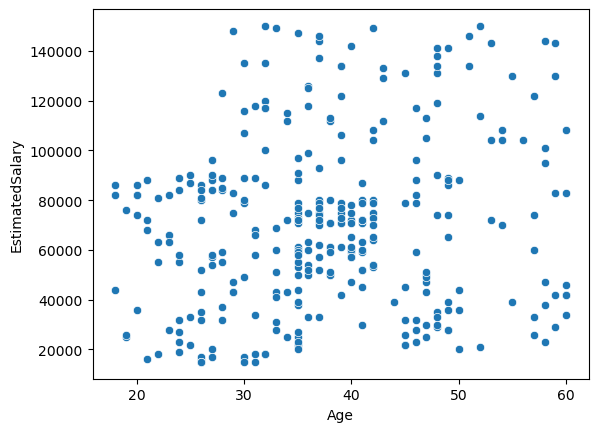

In [66]:
sns.scatterplot(X_train,x="Age",y='EstimatedSalary')


<AxesSubplot: xlabel='Age', ylabel='Salary'>

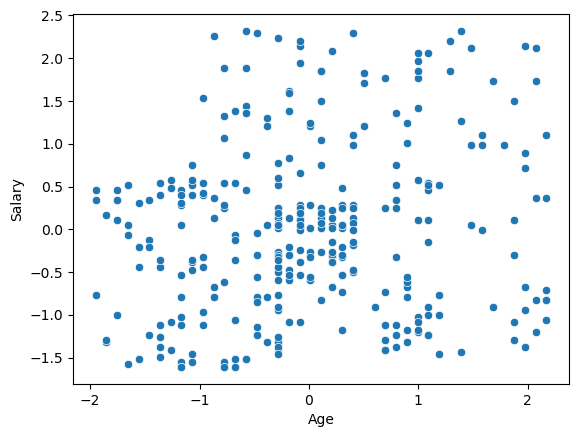

In [64]:
sns.scatterplot(X_train_scaled_df,x="Age",y='Salary')

#### if we see the scatterplot for scaled and non scaled data the distribution is same. 
#### lets see how this scaling affect the results using Linear Regression model

In [77]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score

## Without using the scaling

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [82]:
accuracy_score(y_test,pred)


0.65

## With scaling using standard scaler

In [103]:
model2=LogisticRegression()
model2.fit(X_train_scal,y_train)
pred2=model2.predict(X_test_scal)

In [104]:
accuracy_score(y_test,pred2)

0.8625

### We can see here the clear difference between the scaled and  an scaled data with same machine learning model

# lets do it with decision tree model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [109]:
clf_scaled=DecisionTreeClassifier()
clf_scaled.fit(X_train_scal,y_train)
pred_scale=clf_scaled.predict(X_test_scal)

In [110]:
print('Accuracy without scale:',accuracy_score(y_test,pred))
print('Accuracy with scaling:',accuracy_score(y_test,pred_scale))

Accuracy without scale: 0.8375
Accuracy with scaling: 0.8375


### we can see accuracy of models with and without scaling is same for Desicision tree classification which dont use distance calculation for their model